# Fitting NMF

## Importing libraries and initial config

In [ ]:
!pip install gensim -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=58495dddb3e33ebc51d5779edc3ae01769f1e9b926c2ae226b0c139d4e6b4d9f
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=35aba55af190cb5416474044c95a9c65056341626ced1627eb8933a0a8fcb3fd
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0

In [ ]:
# !pip install gensim==4.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.0
    Uninstalling gensim-4.3.0:
      Successfully uninstalled gensim-4.3.0


In [ ]:
# !pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy==1.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 25.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
! pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 12.7 MB/s eta 0:00:00


In [ ]:
# !pip install umap hdbscan
# !pip install umap-learn

In [ ]:
# ! gcloud auth login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=mCC8o0TX3nmZzmIbSvD2MhHfJsphE6&prompt=consent&access_type=offline&code_challenge=TCPOlEGPacK3lBfhWnAB-RZGl6YAmzF5Q4wWAnieHyc&code_challenge_method=S256

Enter authorization code: 4/0AWtgzh4A8wL_QRUvitteYpnJwvSlwjd8m1G5sZQhewE3WQl0uLJaufnyFlEd5BlvhE2Z3g

You are now logged in as [deekshita.saikia@policygenius.com].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PR

In [ ]:
! gcloud config set project pg-duke-student-capstone-v1

Updated property [core/project].


In [ ]:
import numpy as np
import pandas as pd
import scipy as scs
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
import os
import datetime as dt
import re

import gensim
from gensim import models
from gensim.utils import simple_preprocess
from gensim.models import Nmf
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora

import nltk
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import contractions
import string
from operator import itemgetter

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

from sklearn.manifold import MDS
from sklearn.decomposition import PCA

import pprint

# import pyLDAvis.gensim_models
import pickle 
# import pyLDAvis

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

pd.set_option("display.max_columns", 50, "display.max_rows", 200)
pp = pprint.PrettyPrinter(indent=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Adding helper functions
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 
        
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]

## Authenticate and read in data

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# from google.cloud import bigquery

# proj_name = 'pg-duke-student-capstone-v1'
# proj_num = '545682952716'
# proj_id = 'pg-duke-student-capstone-v1'
# client = bigquery.Client(project = proj_id)

In [ ]:
# Reading in table
sql = """
        WITH A AS
      (SELECT * FROM `pg-duke-student-capstone-v1.final_merged.clean_nps`)
      SELECT * FROM A
"""

project_id = 'pg-duke-student-capstone-v1'
df_nps = pd.read_gbq(sql, project_id=project_id, dialect="standard")
df_nps.head()

,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description
0,905,1273719.0,homeandauto,962841204,KEv4iDf9fOwFkrqGJ3dG78E3FXmoEjs5,2021-10-04 14:04:10+00:00,10,None,None,Listen to problems,1ae9467c575a4697bd99382cb7901979,1ae9467c575a4697bd99382cb7901979,male,None,NaN,77.0,Direct,Desktop,NaN,0.0,<NA>,divorced,NaN,None
1,1380,428727.0,homeandauto,669663712,a9CaYMZQJ6YAxihgHTyWSD1DhpTxGb9I,2020-07-24 14:09:47+00:00,8,None,None,My experience with Policy genius was great and...,6dfe7167d4c741cca83826dc5b22c580,6dfe7167d4c741cca83826dc5b22c580,female,None,NaN,37.0,Direct,Desktop,NaN,0.0,<NA>,None,NaN,None
2,1389,841048.0,homeandauto,850431113,o9BFKWnnOducRd4AjQcETyjbHbTj0xQb,2021-04-02 16:57:16+00:00,9,None,None,Working with you was fast and easy and I like ...,2f359d6cde594f309b0989e96ce2454f,2f359d6cde594f309b0989e96ce2454f,male,WI,NaN,56.0,Direct,Desktop,NaN,0.0,<NA>,single,NaN,None
3,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None
4,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None


In [ ]:
df_nps['date'] = pd.to_datetime(df_nps['created_at'])
# df_nps['day'] = df_nps['date'].dt.day
df_nps['month'] = df_nps['date'].dt.month
df_nps['year'] = df_nps['date'].dt.year
# df_nps["month-year"] = df_nps.month.astype(str) + "-" + df_nps.year.astype(str)
df_nps = df_nps.loc[df_nps["year"]==2022].copy()

In [ ]:
df_nps["score_categorized"] = pd.cut(df_nps.score, bins=[-np.inf, 6, 8, 10],
                  labels=["detractor", "passive", "promoter"])

In [ ]:
df_nps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732 entries, 3 to 13258
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   int64_field_0                 1732 non-null   Int64              
 1   application_id                1732 non-null   float64            
 2   product_type                  1732 non-null   object             
 3   respondent_id                 1732 non-null   Int64              
 4   survey_key                    1732 non-null   object             
 5   created_at                    1732 non-null   datetime64[ns, UTC]
 6   score                         1732 non-null   Int64              
 7   zendesk_ticket_id             0 non-null      object             
 8   medium                        0 non-null      object             
 9   verbatim                      1732 non-null   object             
 10  analytics_user_id             1717 

In [ ]:
df_nps.describe()

,int64_field_0,application_id,respondent_id,score,individual_income,age,bmi,num_conditions,history_of_tobacco_use,segment,month,year
count,1732.000000,1.732000e+03,1.732000e+03,1732.000000,1.085000e+03,1717.000000,1093.000000,1717.000000,1094,1084.000000,1732.000000,1732.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,971,NaN,NaN,NaN
mean,6121.853926,3.628237e+06,1.105343e+09,9.274827,1.061116e+05,46.777519,27.350412,0.747234,NaN,6.383764,4.116628,2022.0
std,3436.531031,1.770590e+06,9.615456e+07,1.760859,1.015189e+05,14.158094,4.820856,1.110529,NaN,3.417185,2.145548,0.0
min,12.000000,6.776400e+04,4.283875e+07,0.000000,0.000000e+00,18.000000,17.000000,0.000000,NaN,1.000000,1.000000,2022.0
25%,3154.000000,1.676528e+06,1.077108e+09,9.000000,5.000000e+04,35.000000,24.000000,0.000000,NaN,5.000000,2.000000,2022.0
50%,6133.500000,4.767772e+06,1.112234e+09,10.000000,8.500000e+04,44.000000,27.000000,0.000000,NaN,6.000000,4.000000,2022.0
75%,9067.750000,5.209450e+06,1.148619e+09,10.000000,1.400000e+05,58.000000,30.000000,1.000000,NaN,10.000000,6.000000,2022.0


In [ ]:
df_nps["verbatim"].head(20)

3     My agent was very informed and help make the p...
4     I got my insurance for both vehicles cut in ha...
13                     Excellent customer service, easy
31    You ask the the same questions overs and over....
34     Very pleasant and took care of things promptly. 
35            User friendly and great customer service 
36                    The application process was easy.
37                     Good price, but really busy team
38    Friendly staff, easy process, and a helpful se...
39                                   Top notch quality 
41    You didn't just forward my answers to the insu...
45                                         Good company
46    The person that helped me was amazing. It was ...
51    Easy and effective - took the work out of it f...
52             It was quick and easy and I saved money.
53    Service was prompt, efficient and systems are ...
55    From the helpful information explained that I ...
56    I was helped so much by a young man that s

In [ ]:
df_nps["verbatim"].tail(20)

13135    I felt like i did more of this than policygeni...
13136                                 It's nice and simple
13137    Ease of use, competitive rates, helpful guidan...
13150                           Great and easy to register
13155    2nd experience with Policygenius. Very easy an...
13159                             I had excellent service 
13165    I like the seamless experience and no pushy sa...
13175                                         Great rates 
13181    Easy process, friendly and professional staff,...
13187                                        Best service 
13216    The representatives were nice, patient, inform...
13221    Very professional & timely team to work with t...
13223    It’s free and makes a complicated and intimida...
13235                             explained clear and well
13241                        Great service & easy process 
13242    Straight forward pricing, and process. No surp...
13245    I liked the idea of a comparison website who d.

## Pre-processing

In [ ]:
stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'use', 'policygenius', 'policy', 'genius','insurance', "pg", 'none', 'na', "able", "already", "also",
                   "was", "were", "thus", "although", "always", "bc", "because", "definitely", "could", "couldnt", 'would', "wouldnt"])

def preprocess(text_col):
    """This function will apply NLP preprocessing lambda functions over a pandas series such as df['text'].
       These functions include converting text to lowercase, removing emojis, expanding contractions, removing punctuation,
       removing numbers, removing stopwords, lemmatization, etc."""
    
    # convert to lowercase
    text_col = text_col.apply(lambda x: ' '.join([w.lower() for w in x.split()]))
    
    # remove emojis
    #text_col = text_col.apply(lambda x: demoji.replace(x, ""))
    
    # expand contractions  
    text_col = text_col.apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()])) # isn't --> is not

    # remove punctuation
    text_col = text_col.apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))
    
    # remove numbers
    text_col = text_col.apply(lambda x: ' '.join(re.sub("[^a-zA-Z]+", " ", x).split()))

    # remove stopwords
    stopwords = [sw for sw in stop_words if sw not in ['not', 'no']]
    text_col = text_col.apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

    # lemmatization

    text_col = text_col.apply(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w) for w in x.split()])) # terms --> term

    # stemming
    # from nltk.stem import PorterStemmer
    # text_col = text_col.apply(lambda x: ' '.join([PorterStemmer().stem(w) for w in x.split()])) # asking --> ask

    # remove short words
    text_col = text_col.apply(lambda x: ' '.join([w.strip() for w in x.split() if len(w.strip()) >= 3]))

    return text_col

In [ ]:
df_nps.head(2)

,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description,date,month,year,score_categorized
3,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-01-06 13:03:58+00:00,1,2022,promoter
4,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-02-17 11:47:16+00:00,2,2022,promoter


In [ ]:
out = preprocess(df_nps["verbatim"])
out.head()

3     agent informed help make process super easy pa...
4     got vehicle cut half amazing mrskrista helpful...
13                      excellent customer service easy
31    ask question over secure web site difficult ac...
34                    pleasant took care thing promptly
Name: verbatim, dtype: object

In [ ]:
data_words = list(sent_to_words(out))
data_words = remove_stopwords(data_words)
print(data_words[1][:10])

['got', 'vehicle', 'cut', 'half', 'amazing', 'mrskrista', 'helpful', 'listened', 'everything', 'wanted']


## Adding bigrams and trigrams to the corpus

In [ ]:
# Addign bigrams
bigram = gensim.models.Phrases(data_words, min_count=1, threshold=2) # higher threshold will result in fewer phrases
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[sent] for sent in data_words]

In [ ]:
# Adding trigrams
trigram = gensim.models.Phrases(bigram[data_words], threshold=3)
trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_trigrams = [trigram_mod[sent] for sent in data_words_bigrams]

In [ ]:
# Create Dictionary
dictionary = corpora.Dictionary(data_words_trigrams)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2500)

# Create Corpus
texts = data_words_trigrams

# Term Document Frequency
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
corpus[2]

[(16, 1), (17, 1)]

## Fitting NNMF

[(4, 0.27569), (5, 0.30218), (6, 0.31694), (7, 0.29481), (8, 0.33268), (9, 0.31203), (10, 0.32794)]
8


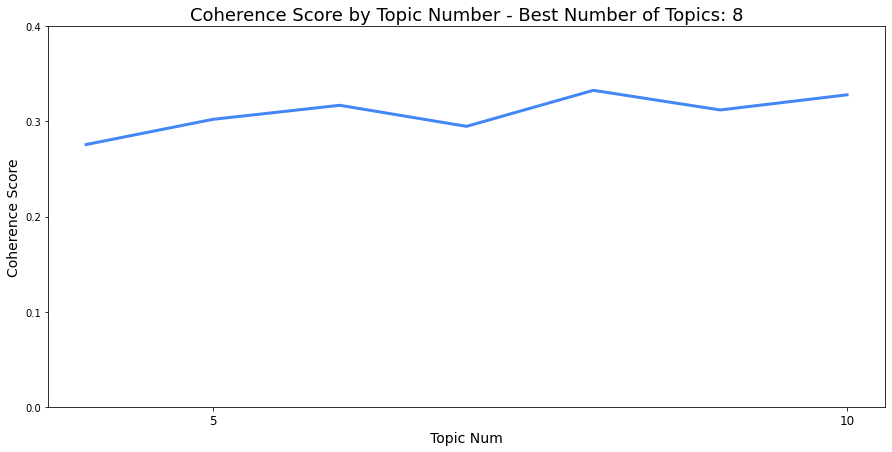

In [ ]:
# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(4, 11, 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
print(scores)
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

print(best_num_topics)

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(np.arange(0,0.5, 0.1))

# file_name = 'c_score'

# fig.savefig(
#     file_path + file_name + '.png',
#     dpi=fig.dpi,
#     bbox_inches='tight'
# )

plt.show()

In [2]:
# collecting coherence scores into a dataframe
df_scores = pd.DataFrame({"Num_Topics":[4,5,6,7,8,9,10],"NNMF_Coherence_Score":[0.27569, 0.30218, 0.31694, 0.29481, 0.33268, 0.31203, 0.32794]})
display(df_scores)
df_scores.to_csv("NNMF_coherence_scores.csv", index = False)

,Num_Topics,NNMF_Coherence_Score
0,4,0.27569
1,5,0.30218
2,6,0.31694
3,7,0.29481
4,8,0.33268
5,9,0.31203
6,10,0.32794


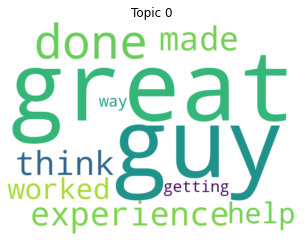

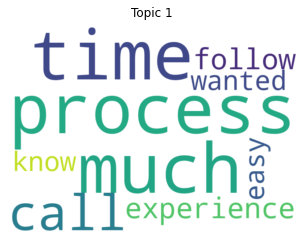

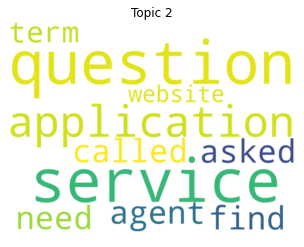

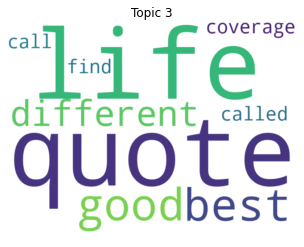

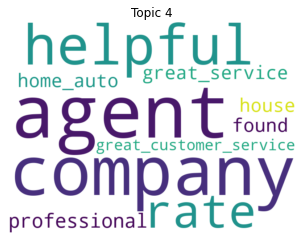

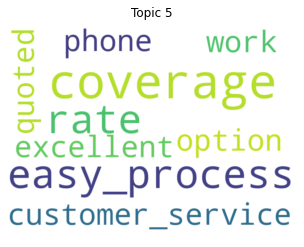

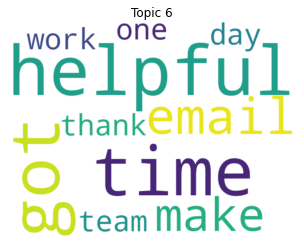

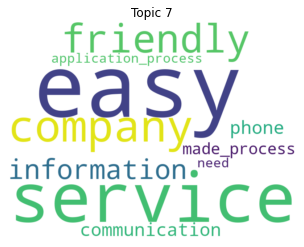

In [ ]:
# Fitting NMF again with 8 topics
nmf_model = Nmf(
        corpus=corpus,
        num_topics=8,
        id2word=dictionary,
        chunksize=2000,
        passes=10,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

# Visualize top words for each topic
top_words_per_topic = []
for topic in nmf_model.show_topics(num_topics=nmf_model.num_topics):
    top_words = [word for word, _ in nmf_model.show_topic(topic[0], topn=10)]
    top_words_per_topic.append(' '.join(top_words))

# Create word cloud for each topic
for i in range(nmf_model.num_topics):
    wordcloud = WordCloud(background_color='white', width=800, height=600).generate(top_words_per_topic[i])
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic {}'.format(i))
    plt.show()


## Applying the optimal number of topics from above with sklearn

In [ ]:
df_nps["processed_verbatim"] = preprocess(df_nps["verbatim"])
df_nps["processed_verbatim"] = list(sent_to_words(df_nps["processed_verbatim"]))
df_nps["processed_verbatim"] = remove_stopwords(df_nps["processed_verbatim"])
df_nps.head()

,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description,date,month,year,score_categorized,processed_verbatim
3,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-01-06 13:03:58+00:00,1,2022,promoter,"[agent, informed, help, make, process, super, ..."
4,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-02-17 11:47:16+00:00,2,2022,promoter,"[got, vehicle, cut, half, amazing, mrskrista, ..."
13,5265,1925464.0,homeandauto,1190819616,YjUVc6Yho20ORKHxpbpKWXcgBtfjJClE,2022-08-15 08:19:12+00:00,10,None,None,"Excellent customer service, easy",48cad9795bcd4bad8d232386a29857f1,48cad9795bcd4bad8d232386a29857f1,female,None,NaN,56.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-08-15 08:19:12+00:00,8,2022,promoter,"[excellent, customer, service, easy]"
31,1894,5285106.0,life,1103443465,DRksmXU4kuZlrEJ8XBbodYPBeNLljzbM,2022-04-01 12:03:30+00:00,1,None,None,You ask the the same questions overs and over....,ff23a4f181294f70bb3a9a7c0e874878,ff23a4f181294f70bb3a9a7c0e874878,male,MA,NaN,74.0,Direct,Desktop,28.0,0.0,False,None,NaN,Unknown,2022-04-01 12:03:30+00:00,4,2022,detractor,"[ask, question, secure, web, site, difficult, ..."
34,3875,5011668.0,life,1056191540,KDuxwoFx5heVSGbEp5FyDEn5HOEPNwu3,2022-01-19 21:02:49+00:00,10,None,None,Very pleasant and took care of things promptly.,8bb37adafaa04bb7b72a2f1e87b901a9,8bb37adafaa04bb7b72a2f1e87b901a9,male,CO,NaN,65.0,Warm Lead,Desktop,31.0,0.0,False,None,NaN,Unknown,2022-01-19 21:02:49+00:00,1,2022,promoter,"[pleasant, took, care, thing, promptly]"


In [ ]:
texts = df_nps["processed_verbatim"]

bigram = gensim.models.Phrases(texts, min_count=1, threshold=2) # higher threshold will result in fewer phrases
bigram_mod = gensim.models.phrases.Phraser(bigram)
data_words_bigrams = [bigram_mod[sent] for sent in data_words]

trigram = gensim.models.Phrases(bigram[data_words], threshold=3)
trigram_mod = gensim.models.phrases.Phraser(trigram)
data_words_trigrams = [trigram_mod[sent] for sent in data_words_bigrams]


In [ ]:
# using topics against highest coherence score and applying to sklearn's nmf
# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(data_words_trigrams)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    # alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [ ]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

top_n_topics = 10

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

topics = {}
for topic_idx, topic in enumerate(nmf.components_):
  t = (topic_idx)
  top_words = topic.argsort()[:-top_n_topics - 1:-1]
  topics[t] = [tfidf_fn[i] for i in top_words]
topic_df = pd.DataFrame(topics).T 

tokenizer_regex = RegexpTokenizer(r"(?u)\b\w\w+\b")

def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: tokenizer_regex.tokenize(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

display(topic_df)

,0,1,2,3,4,5,6,7,8,9,topics
0,easy,whole_process,great_rate,easy helpful,application_process,made_process easy,made_process,experience,life,deal,easy whole_process great_rate helpful applicat...
1,helpful,agent,easy helpful,representative,team,question,quick,agent helpful,easy_work,informative,helpful agent easy representative team questio...
2,great_service,ease,best_price,great_price,great_rate,easy_work,team,quick_easy,well,whole_process,great_service ease best_price great_price grea...
3,easy_process,thank,easy_process helpful,good_communication,friendly,rep,agent_knowledgeable,customer_service,competitive_rate,phone,easy_process thank helpful good_communication ...
4,great,service great,help,everything,customer_service great,follow,rate,guy,people,quote,great service help everything customer_service...
5,great_customer_service,great_rate,price,super,good_rate,smooth_process,combined,simple_process,user_friendly,easy_get,great_customer_service great_rate price super ...
6,process,good,company,customer_service,agent,quote,communication,life,easy_work,experience,process good company customer_service agent qu...
7,service,service great,good_customer,good_customer service,quick,friendly,great_rate,efficient,responsive,response,service great good_customer quick friendly gre...


In [ ]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df


,topic_num,topics
0,0,easy whole_process great_rate helpful applicat...
1,1,helpful agent easy representative team questio...
2,2,great_service ease best_price great_price grea...
3,3,easy_process thank helpful good_communication ...
4,4,great service help everything customer_service...
5,5,great_customer_service great_rate price super ...
6,6,process good company customer_service agent qu...
7,7,service great good_customer quick friendly gre...


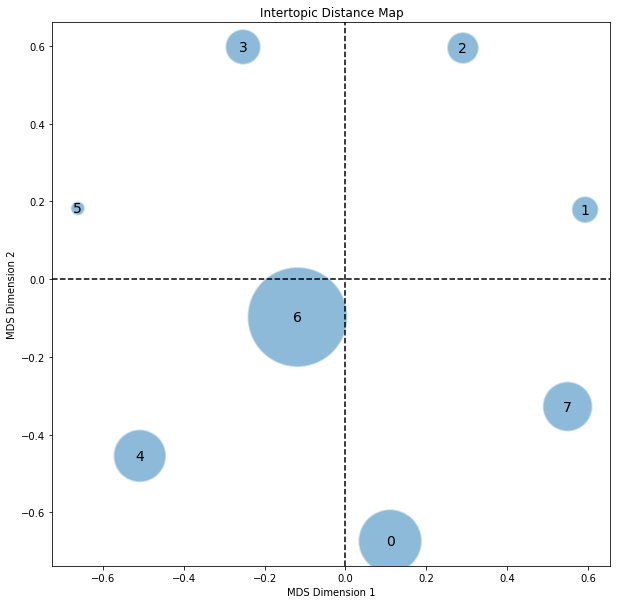

In [ ]:
# USING MDS
# Get the intertopic distances
inter_topic_dist = cosine_distances(nmf.components_)
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
pos = mds.fit_transform(inter_topic_dist)

# Get topic sizes
doc_topic = nmf.transform(tfidf)
topic_sizes = doc_topic.sum(axis=0)

# Create pandas DataFrame
df = pd.DataFrame({'x': pos[:, 0], 'y': pos[:, 1], 'size': topic_sizes, 'topic': range(best_num_topics)})

# Plot the intertopic distance map with seaborn
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x='x', y='y', size='size', sizes=(200, 10000), alpha=0.5, legend=False)
for i, row in df.iterrows():
    ax.annotate(row['topic'].astype(int), (row['x'], row['y']), ha='center', va='center', fontsize=14)
ax.axhline(0, color='black', linestyle='--')
ax.axvline(0, color='black', linestyle='--')
plt.title("Intertopic Distance Map")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()


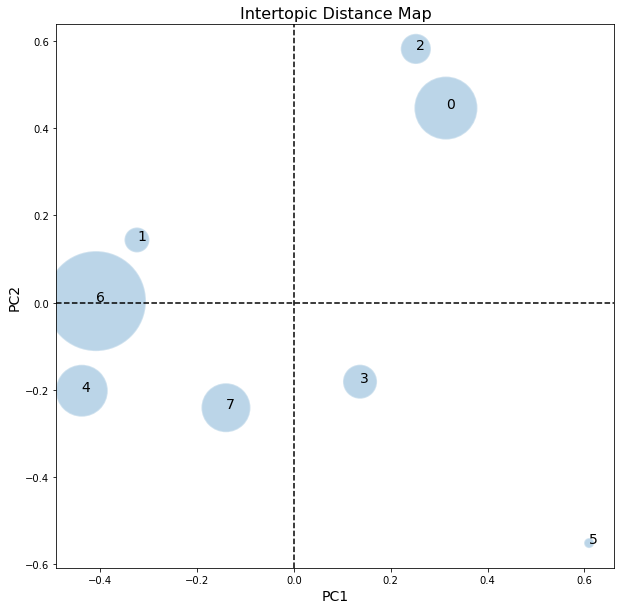

In [ ]:
# USING PCA
# Get the intertopic distances
inter_topic_dist = cosine_distances(nmf.components_)

# Reduce the dimensionality of intertopic distances to 2 using PCA
pca = PCA(n_components=2, random_state=42)
pos = pca.fit_transform(inter_topic_dist)

# Get the marginal topic distribution
marginal_topic_dist = nmf.transform(tfidf)
topic_sizes = marginal_topic_dist.sum(axis=0)

# Plot the intertopic distance map
names = [str(i) for i in range(best_num_topics)]
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pos[:, 0], y=pos[:, 1], size=topic_sizes, sizes=(100, 10000), alpha=0.3, legend = False)
for i, name in enumerate(names):
    plt.annotate(str(i), (pos[i, 0], pos[i, 1]), fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Intertopic Distance Map", fontsize = 16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()


In [ ]:
# Get the top 10 terms for each topic
def get_top_terms(model, feature_names, num_terms=10):
    top_terms = []
    for topic_idx, topic in enumerate(model.components_):
        term_indices = np.argsort(topic)[::-1][:num_terms]
        topic_terms = [feature_names[i] for i in term_indices]
        top_terms.append(topic_terms)
    return top_terms

# Get the top 10 topic weights for each document
# def get_top_topics(model, doc_topic_dists, num_topics=10):
#     top_topics = []
#     for doc_idx, doc in enumerate(doc_topic_dists):
#         topic_indices = np.argsort(doc)[::-1][:num_topics]
#         topic_weights = [doc[i] for i in topic_indices]
#         top_topics.append(topic_weights)
#     return top_topics

def plot_top_terms(model, feature_names, num_terms=10):
    top_terms = get_top_terms(model, feature_names, num_terms)
    num_topics = len(top_terms)
    for topic_idx, topic_terms in enumerate(top_terms):
        term_weights = model.components_[topic_idx][np.argsort(model.components_[topic_idx])[::-1][:num_terms]]
        sorted_terms = [term for _, term in sorted(zip(term_weights, topic_terms))]
        term_weights.sort()
        plt.figure()
        plt.barh(range(num_terms), term_weights, align='center')
        plt.yticks(range(num_terms), sorted_terms)
        plt.xlabel("Term Weight")
        plt.title(f"Topic {topic_idx}")
        plt.show()

# # Create a bar plot for the top topics for each document
# def plot_top_topics(model, doc_topic_dists, num_topics=10):
#     top_topics = get_top_topics(model, doc_topic_dists, num_topics)
#     num_docs = len(top_topics)
#     for doc_idx, doc_topics in enumerate(top_topics):
#         plt.figure()
#         plt.barh(range(num_topics), doc_topic_dists[doc_idx][np.argsort(doc_topic_dists[doc_idx])[::-1][:num_topics]], align='center')
#         plt.yticks(range(num_topics), np.argsort(doc_topics)[::-1]+1)
#         plt.xlabel("Topic Weight")
#         plt.title(f"Document {doc_idx}")
#         plt.show()



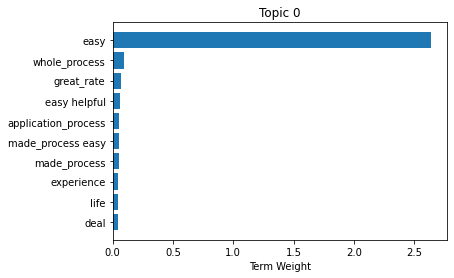

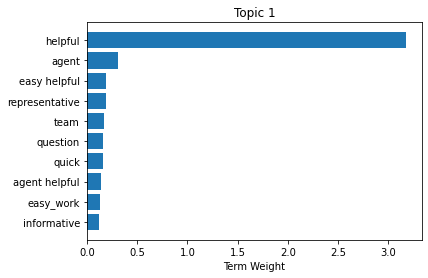

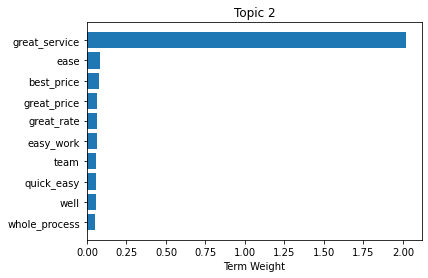

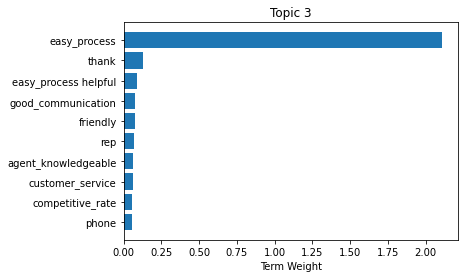

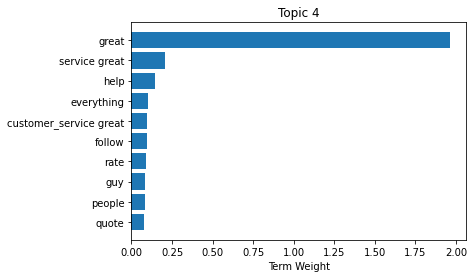

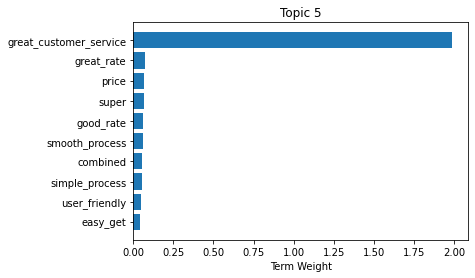

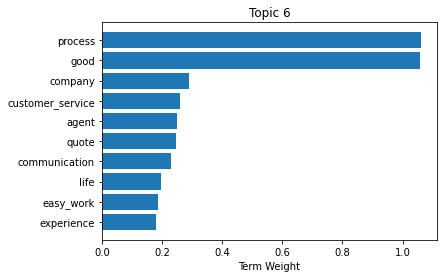

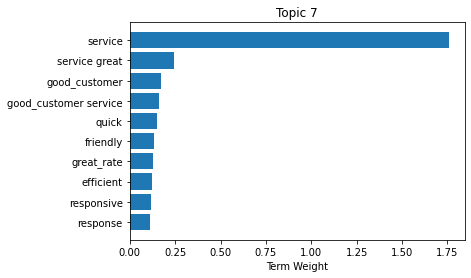

In [ ]:
plot_top_terms(nmf,tfidf_fn)

## Generating predictions with fitted model

In [ ]:
df_nps.head()

,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description,date,month,year,score_categorized,processed_verbatim
3,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-01-06 13:03:58+00:00,1,2022,promoter,"[agent, informed, help, make, process, super, ..."
4,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-02-17 11:47:16+00:00,2,2022,promoter,"[got, vehicle, cut, half, amazing, mrskrista, ..."
13,5265,1925464.0,homeandauto,1190819616,YjUVc6Yho20ORKHxpbpKWXcgBtfjJClE,2022-08-15 08:19:12+00:00,10,None,None,"Excellent customer service, easy",48cad9795bcd4bad8d232386a29857f1,48cad9795bcd4bad8d232386a29857f1,female,None,NaN,56.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-08-15 08:19:12+00:00,8,2022,promoter,"[excellent, customer, service, easy]"
31,1894,5285106.0,life,1103443465,DRksmXU4kuZlrEJ8XBbodYPBeNLljzbM,2022-04-01 12:03:30+00:00,1,None,None,You ask the the same questions overs and over....,ff23a4f181294f70bb3a9a7c0e874878,ff23a4f181294f70bb3a9a7c0e874878,male,MA,NaN,74.0,Direct,Desktop,28.0,0.0,False,None,NaN,Unknown,2022-04-01 12:03:30+00:00,4,2022,detractor,"[ask, question, secure, web, site, difficult, ..."
34,3875,5011668.0,life,1056191540,KDuxwoFx5heVSGbEp5FyDEn5HOEPNwu3,2022-01-19 21:02:49+00:00,10,None,None,Very pleasant and took care of things promptly.,8bb37adafaa04bb7b72a2f1e87b901a9,8bb37adafaa04bb7b72a2f1e87b901a9,male,CO,NaN,65.0,Warm Lead,Desktop,31.0,0.0,False,None,NaN,Unknown,2022-01-19 21:02:49+00:00,1,2022,promoter,"[pleasant, took, care, thing, promptly]"


In [ ]:
# Transform the new data with the fitted models
tfidf_new = tfidf_vectorizer.transform(data_words_trigrams)
X_new = nmf.transform(tfidf_new)

# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in X_new]

# Add to the df
df_nps['pred_topic_num'] = predicted_topics

df_nps.head(10)

,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description,date,month,year,score_categorized,processed_verbatim,pred_topic_num
3,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-01-06 13:03:58+00:00,1,2022,promoter,"[agent, informed, help, make, process, super, ...",6
4,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-02-17 11:47:16+00:00,2,2022,promoter,"[got, vehicle, cut, half, amazing, mrskrista, ...",1
13,5265,1925464.0,homeandauto,1190819616,YjUVc6Yho20ORKHxpbpKWXcgBtfjJClE,2022-08-15 08:19:12+00:00,10,None,None,"Excellent customer service, easy",48cad9795bcd4bad8d232386a29857f1,48cad9795bcd4bad8d232386a29857f1,female,None,NaN,56.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-08-15 08:19:12+00:00,8,2022,promoter,"[excellent, customer, service, easy]",0
31,1894,5285106.0,life,1103443465,DRksmXU4kuZlrEJ8XBbodYPBeNLljzbM,2022-04-01 12:03:30+00:00,1,None,None,You ask the the same questions overs and over....,ff23a4f181294f70bb3a9a7c0e874878,ff23a4f181294f70bb3a9a7c0e874878,male,MA,NaN,74.0,Direct,Desktop,28.0,0.0,False,None,NaN,Unknown,2022-04-01 12:03:30+00:00,4,2022,detractor,"[ask, question, secure, web, site, difficult, ...",6
34,3875,5011668.0,life,1056191540,KDuxwoFx5heVSGbEp5FyDEn5HOEPNwu3,2022-01-19 21:02:49+00:00,10,None,None,Very pleasant and took care of things promptly.,8bb37adafaa04bb7b72a2f1e87b901a9,8bb37adafaa04bb7b72a2f1e87b901a9,male,CO,NaN,65.0,Warm Lead,Desktop,31.0,0.0,False,None,NaN,Unknown,2022-01-19 21:02:49+00:00,1,2022,promoter,"[pleasant, took, care, thing, promptly]",6
35,4279,1658107.0,homeandauto,1111427605,dxK3aqBvRNzrMqUn9T7P8WyT1sgKxxwy,2022-04-13 11:52:14+00:00,10,None,None,User friendly and great customer service,d8fffd4c-848a-496b-a920-f5face03750a,d8fffd4c-848a-496b-a920-f5face03750a,female,None,NaN,47.0,Social,iOS,NaN,0.0,<NA>,divorced,NaN,Unknown,2022-04-13 11:52:14+00:00,4,2022,promoter,"[user, friendly, great, customer, service]",5
36,5200,5339235.0,life,1111266449,mHXbzKOFVDivHYGxOtz0yTTRipr38Hjz,2022-04-13 11:55:44+00:00,10,None,None,The application process was easy.,e5256c6090c541e18fc9af8ef4957c79,e5256c6090c541e18fc9af8ef4957c79,male,SC,NaN,68.0,Warm Lead,Desktop,24.0,1.0,False,married,NaN,Unknown,2022-04-13 11:55:44+00:00,4,2022,promoter,"[application, process, easy]",0
37,5244,1870236.0,homeandauto,1173137690,VvAeO437Io0jLrpxuFp96TO9sRsNGnZO,2022-07-18 13:36:01+00:00,8,None,None,"Good price, but really busy team",4652b54e-03f5-479b-bd4b-1ab2435d9b44,4652b54e-03f5-479b-bd4b-1ab2435d9b44,male,None,NaN,53.0,Programmatic Video,Desktop,NaN,0.0,<NA>,married,NaN,Unknown,2022-07-18 13:36:01+00:00,7,2022,passive,"[good, price, really, busy, team]",6
38,5529,1923686.0,homeandauto,1188012863,P2OmsWjFkqTLLKpge6GdPH0yOEQfslOi,2022-08-09 17:48:17+00:00,10,None,None,"Friendly staff, easy process, and a helpful se...",d3e18db9-6e34-49f9-bfe0-266a1be17fb2,d3e18db9-6e34-49f9-bfe0-266a1be17fb2,male,None,NaN,34.0,Programmatic Video,Desktop,NaN,0.0,<NA>,married,NaN,Unknown,2022-08-09 17:48:17+00:00,8,2022,promoter,"[friendly, staff, easy, process, helpful, serv...",3
39,5755,1656879.0,homeandauto,1112620031,DHp5i5Q3AEmzCtBzPwttAL5QJgaFkunh,2022-04-15 12:31:32+00:00,10,None,None,Top notch quality,348c389f-fb3c-4db9-b63e-e05e3aadfdea,348c389f-fb3c-4db

In [ ]:
# Join with the original df to get the topic summary
df_merged = df_nps.merge(topic_df, how="left", left_on = "pred_topic_num", right_on = "topic_num")
df_merged.head()


,int64_field_0,application_id,product_type,respondent_id,survey_key,created_at,score,zendesk_ticket_id,medium,verbatim,analytics_user_id,analytics_user_id_1,gender,state_code,individual_income,age,marketing_application_source,first_touch_device,bmi,num_conditions,history_of_tobacco_use,marital_status,segment,segment_description,date,month,year,score_categorized,processed_verbatim,pred_topic_num,topic_num,topics
0,1398,1454888.0,homeandauto,1047155544,BHUlqVZW1c5am64nlz3rXnnJop68iqXS,2022-01-06 13:03:58+00:00,10,None,None,My agent was very informed and help make the p...,052feaa8c2a14c94953481e4c0567dd3,052feaa8c2a14c94953481e4c0567dd3,male,CA,NaN,28.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-01-06 13:03:58+00:00,1,2022,promoter,"[agent, informed, help, make, process, super, ...",6,6,process good company customer_service agent qu...
1,1419,1544133.0,homeandauto,1075912288,qSi8fsNFAjS3atrE54cmsd52Mec8gsmP,2022-02-17 11:47:16+00:00,10,None,None,I got my insurance for both vehicles cut in ha...,653fc046465e40dc8b3b0f73a17bdcfd,653fc046465e40dc8b3b0f73a17bdcfd,male,LA,NaN,35.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-02-17 11:47:16+00:00,2,2022,promoter,"[got, vehicle, cut, half, amazing, mrskrista, ...",1,1,helpful agent easy representative team questio...
2,5265,1925464.0,homeandauto,1190819616,YjUVc6Yho20ORKHxpbpKWXcgBtfjJClE,2022-08-15 08:19:12+00:00,10,None,None,"Excellent customer service, easy",48cad9795bcd4bad8d232386a29857f1,48cad9795bcd4bad8d232386a29857f1,female,None,NaN,56.0,Direct,Desktop,NaN,0.0,<NA>,married,NaN,None,2022-08-15 08:19:12+00:00,8,2022,promoter,"[excellent, customer, service, easy]",0,0,easy whole_process great_rate helpful applicat...
3,1894,5285106.0,life,1103443465,DRksmXU4kuZlrEJ8XBbodYPBeNLljzbM,2022-04-01 12:03:30+00:00,1,None,None,You ask the the same questions overs and over....,ff23a4f181294f70bb3a9a7c0e874878,ff23a4f181294f70bb3a9a7c0e874878,male,MA,NaN,74.0,Direct,Desktop,28.0,0.0,False,None,NaN,Unknown,2022-04-01 12:03:30+00:00,4,2022,detractor,"[ask, question, secure, web, site, difficult, ...",6,6,process good company customer_service agent qu...
4,3875,5011668.0,life,1056191540,KDuxwoFx5heVSGbEp5FyDEn5HOEPNwu3,2022-01-19 21:02:49+00:00,10,None,None,Very pleasant and took care of things promptly.,8bb37adafaa04bb7b72a2f1e87b901a9,8bb37adafaa04bb7b72a2f1e87b901a9,male,CO,NaN,65.0,Warm Lead,Desktop,31.0,0.0,False,None,NaN,Unknown,2022-01-19 21:02:49+00:00,1,2022,promoter,"[pleasant, took, care, thing, promptly]",6,6,process good company customer_service agent qu...


In [ ]:
pd.set_option('display.max_colwidth', 0)
df_merged[["verbatim","pred_topic_num","topics"]].head(20)

,verbatim,pred_topic_num,topics
0,My agent was very informed and help make the process super easy and painless for me. And they got my a policy that ended up saving me money as well.,6,process good company customer_service agent quote communication life easy_work experience
1,"I got my insurance for both vehicles cut in half, which is amazing!! And Mrs.Krista was very helpful and listened to everything I wanted for my vehicles; I will definitely recommend this company to anyone!! 10/10!",1,helpful agent easy representative team question quick easy_work informative
2,"Excellent customer service, easy",0,easy whole_process great_rate helpful application_process made_process experience life deal
3,You ask the the same questions overs and over. Your “secure web site” is difficult to access.,6,process good company customer_service agent quote communication life easy_work experience
4,Very pleasant and took care of things promptly.,6,process good company customer_service agent quote communication life easy_work experience
5,User friendly and great customer service,5,great_customer_service great_rate price super good_rate smooth_process combined simple_process user_friendly easy_get
6,The application process was easy.,0,easy whole_process great_rate helpful application_process made_process experience life deal
7,"Good price, but really busy team",6,process good company customer_service agent quote communication life easy_work experience
8,"Friendly staff, easy process, and a helpful service",3,easy_process thank helpful good_communication friendly rep agent_knowledgeable customer_service competitive_rate phone
9,Top notch quality,7,service great good_customer quick friendly great_rate efficient responsive response


In [ ]:
df_merged[["verbatim","pred_topic_num","topics"]].tail(20)

,verbatim,pred_topic_num,topics
1712,I felt like i did more of this than policygenius did. The folks i worked with are nice but the interaction should have stopped once quoted with me keeping policygenius in the loop. I felt policygenius was more in the way than providing much value after that.,6,process good company customer_service agent quote communication life easy_work experience
1713,It's nice and simple,6,process good company customer_service agent quote communication life easy_work experience
1714,"Ease of use, competitive rates, helpful guidance through the whole process.",6,process good company customer_service agent quote communication life easy_work experience
1715,Great and easy to register,4,great service help everything customer_service follow rate guy people quote
1716,2nd experience with Policygenius. Very easy and great rates.,0,easy whole_process great_rate helpful application_process made_process experience life deal
1717,I had excellent service,6,process good company customer_service agent quote communication life easy_work experience
1718,I like the seamless experience and no pushy salesmen,6,process good company customer_service agent quote communication life easy_work experience
1719,Great rates,7,service great good_customer quick friendly great_rate efficient responsive response
1720,"Easy process, friendly and professional staff, most of all competitive rates!",3,easy_process thank helpful good_communication friendly rep agent_knowledgeable customer_service competitive_rate phone
1721,Best service,7,service great good_customer quick friendly great_rate efficient responsive response
